# Employee churn analysis
## Dataset
I'll be using a dataset from https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset –
This is a fictional data set created by IBM data scientists.

### Description (to be removed)
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

### What are the goals for the analysis?

We want to know what variables affected the churning of the employees

### Imports

In [1]:
# general
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# data processing 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

# model
from sklearn.ensemble import RandomForestClassifier

### Load the data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### View the data

In [3]:
df.info()
round(df.describe([0.01,0.25,0.50,0.75,0.99]),2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1%,19.00,117.00,1.00,1.00,1.0,19.69,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
99%,58.31,1485.00,29.00,5.00,1.0,2046.62,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,35.00,6.00,4.00,31.00,15.00,14.00,14.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [4]:
# check column
len(df[df.Over18 == "N"])

0

In [5]:
# we can remove this column since all the employees are Over 18
df.drop(columns = 'Over18', inplace = True)

### Checking for outliers

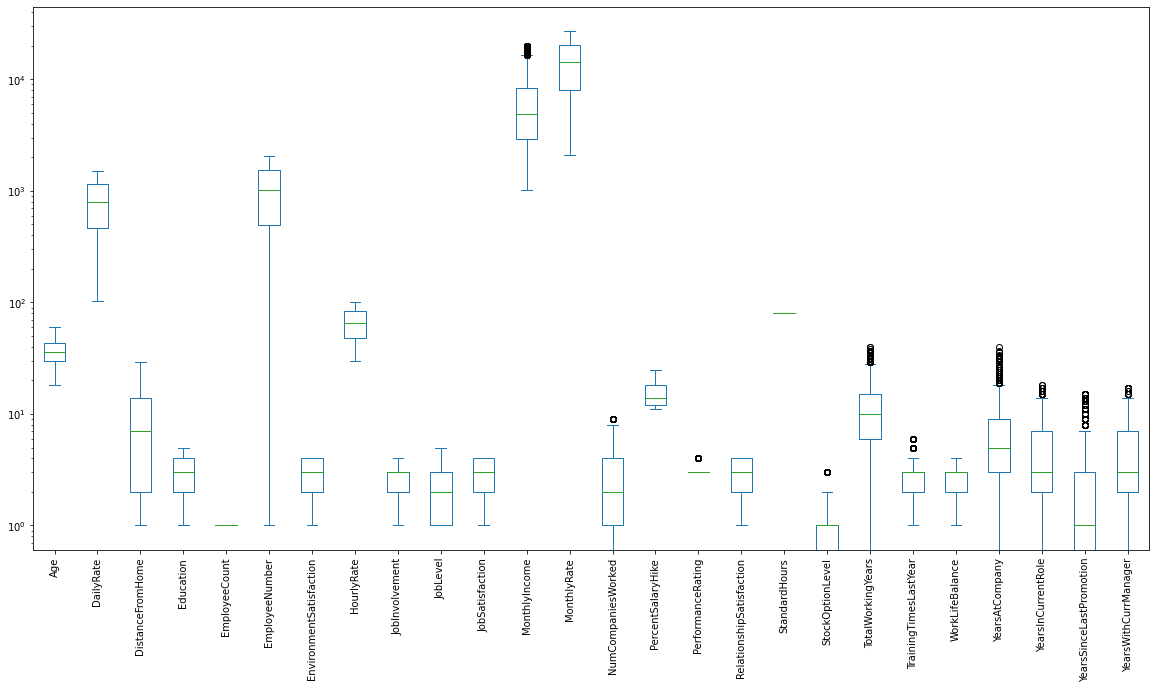

In [6]:
df.plot(kind='box', figsize=(20,10), logy=True)
plt.xticks(rotation=90);

In [7]:
round(df[['NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TrainingTimesLastYear']].describe([0.1,0.25,0.5,0.75,0.99]),2)

,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TrainingTimesLastYear
count,1470.00,1470.00,1470.00,1470.00
mean,2.69,3.15,0.79,2.80
std,2.50,0.36,0.85,1.29
min,0.00,3.00,0.00,0.00
10%,0.00,3.00,0.00,2.00
25%,1.00,3.00,0.00,2.00
50%,2.00,3.00,1.00,3.00
75%,4.00,3.00,1.00,3.00
99%,9.00,4.00,3.00,6.00
max,9.00,4.00,3.00,6.00


## Contents of the dataset

The dataset has no missing values and I don't notice anything unusual that needs fixing

- **Attrition** (yes/no) tells us if the employee has churned

### Demographic
- Age
- Education
- EducationField
- Gender
- JobLevel
- MaritalStatus
- MonthlyIncome
- NumCompaniesWorked
- RelationshipSatisfaction
- WorkLifeBalance

### Job related
- BusinessTravel
- DailyRate
- Department
- DistanceFromHome
- EmployeeCount
- EnvironmentSatisfaction
- HourlyRate 
- JobInvolvement
- JobRole
- JobSatisfaction
- MonthlyRate 
- OverTime
- PercentSalaryHike
- PerformanceRating
- StandardHours
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

#### Check target variable distribution

In [8]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
percentage = []
for value in df["Attrition"].value_counts():
    percentage.append(round(value/len(df['Attrition']) * 100, 2))

Text(0.5, 1.0, 'Attrition ratio in the dataset')

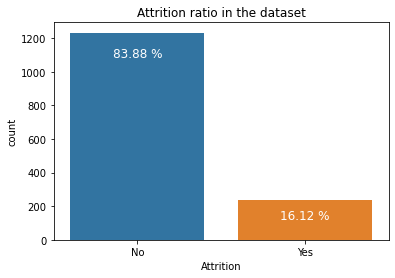

In [10]:
# plot
ax = sns.countplot(x = "Attrition", data = df[::-1])
offset_y = 0.9

for i, p in enumerate(ax.patches):
       
    plt.text(p.get_x() + p.get_width() * 0.5, p.get_y() + p.get_height() * offset_y,
                 f'{percentage[i]} %',
                 ha='center', va='center', color='white', fontsize=12)       
    offset_y = 0.6

plt.title("Attrition ratio in the dataset")

This dataset seems to have a high proportion of active employees compared to their churned counterparts. This needs to be taken into account when evaluating the model. 
- Accuracy is: correct predictions / all predictions
- Accuracy metric won't work well here since we have so many true negatives in the data
- That means if the model predicts all to "0" (no churn) it's still 83.88 % accurate which can seem to be quite good?
- The data imbalance might cause the model to learn to predict 0 (no churn)
- In truth this is not accurate at all and we need to either balance the dataset (for better learning & predictions) or use another metric

Precision metric might work better
- Precision is: out of all employees who were labeled as churned, how many did we correctly label as such? 
- Precision is the ratio of true positives / (true positives + false positives)

## Preparing the data

### set up data for modeling: 

- use label encoder for binary data / ordered data
- use one-hot encoder for columns with more than 2 variables / unordered data
- in this dataset the categorial variables are generally unordered data

In [11]:
le = LabelEncoder()
enc = OneHotEncoder()
le_count = 0
for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) <= 2:
            df[col] = le.fit_transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [12]:
categorical_cols = []
enc_count = 0
for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) > 2:
        categorical_cols.append(col)
        enc_count += 1

transformed_data = enc.fit_transform(df[categorical_cols])

# convert transformed_data (array) to dataframe
encoded_data = pd.DataFrame(transformed_data.toarray(), columns=enc.get_feature_names_out(categorical_cols))

# print
print('{} columns were one-hot encoded.'.format(enc_count))

5 columns were one-hot encoded.


In [13]:
# how the encoded data looks like
encoded_data.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# compare to original data
df.select_dtypes(include=["object"]).head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married


In [15]:
# join the original data and the encoded data to a new dataframe
new_df = pd.concat((df.drop(columns=categorical_cols).copy(), encoded_data), axis = 'columns')

## Modeling

In [16]:
# separate target variable
X = new_df.drop('Attrition', axis = 1)
y = new_df['Attrition']

### Original (imbalanced data)
#### train_test_split

In [17]:
# use stratify to keep the class ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42 , stratify = y, test_size = 0.2)

#### remove identifiers

In [18]:
train_identity = X_train['EmployeeNumber']
X_train = X_train.drop(columns = ['EmployeeNumber'])

test_identity = X_test['EmployeeNumber']
X_test = X_test.drop(columns = ['EmployeeNumber'])

#### normalization

In [19]:
scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns,
    index = X_train.index
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns,
    index = X_test.index
)

#### evaluate model perfomance

In [20]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = classifier.predict(X_test)
print(f'Model accuracy: {accuracy_score(y_pred, y_test) * 100:.1f} %')
print(f'Model precision: {precision_score(y_pred, y_test) * 100:.1f} %')

Model accuracy: 84.0 %
Model precision: 10.6 %


- As can be seen the accuracy was as predicted while precision is terrible

<Figure size 2016x1440 with 0 Axes>

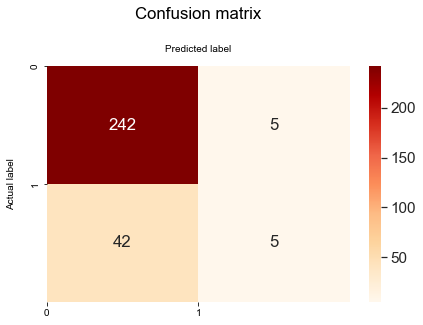

In [22]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g', cmap="OrRd")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()

plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

### Handling the inbalance
We are going to use ADASYN (Adaptive Synthetic Sampling) algorithm to create us more minority samples thus balancing the dataset. It uses a density distribution as a criterion to automatically decide the number of synthetic samples that must be generated for each minority sample. This will help the models learning process and give more precice results.

In [23]:
# balancing the dataset (minority oversampling)
ada = ADASYN()
X, y = ada.fit_resample(X, y)

In [24]:
# use stratify to keep the class ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42 , stratify = y, test_size = 0.2)

#### remove identifiers

In [25]:
train_identity = X_train['EmployeeNumber']
X_train = X_train.drop(columns = ['EmployeeNumber'])

test_identity = X_test['EmployeeNumber']
X_test = X_test.drop(columns = ['EmployeeNumber'])

#### normalization

In [26]:
scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns,
    index = X_train.index
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns,
    index = X_test.index
)

#### evaluate model performance

In [27]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

classifier.feature_names = list(X_train.columns.values)

In [28]:
y_pred = classifier.predict(X_test)
print(f'Model accuracy: {accuracy_score(y_pred, y_test) * 100:.1f} %')
print(f'Model precision: {precision_score(y_pred, y_test) * 100:.1f} %')

Model accuracy: 91.3 %
Model precision: 86.4 %


- This synthetically balanced data yields very good results!

## tuningia tähä viel ja vertailut
- ja sit myös vertailuu vaik 3 eri menetelmää
- ja hyperparametertuning opengridcv

<Figure size 2016x1440 with 0 Axes>

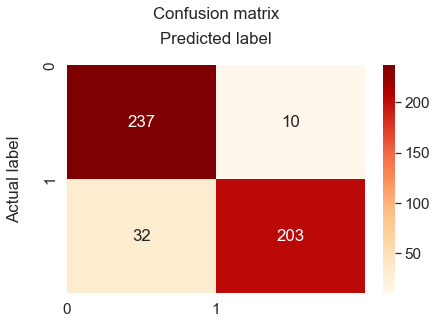

In [29]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g', cmap="OrRd")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()

plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

## I will continue the analysis with the ASDYN balanced data since it gave more accurate results

In [30]:
# get feature importances
f_names = classifier.feature_names
f_imp = classifier.feature_importances_

# sort
sortedIndex = list(np.argsort(f_imp))[::-1]

# top 10 sorted
f_imp = [f_imp[i] for i in sortedIndex][:10]
f_names = [f_names[i] for i in sortedIndex][:10]

Text(0.5, 1.03, 'Most important features')

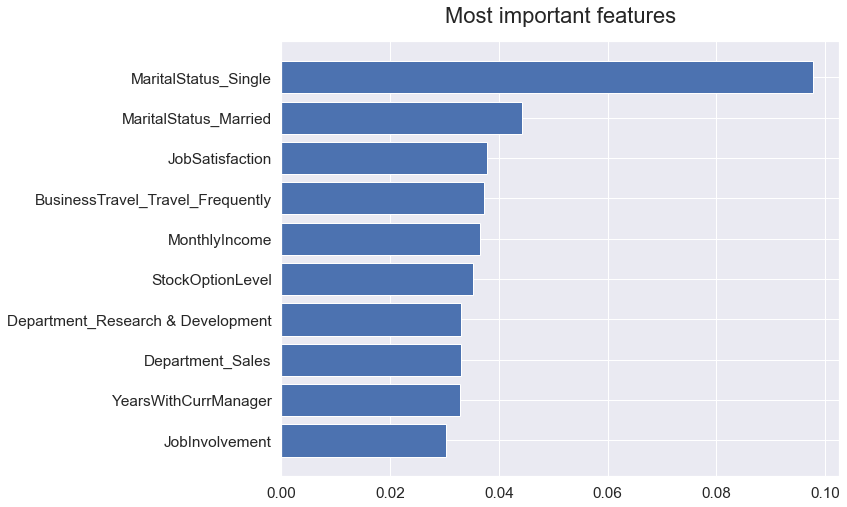

In [31]:
# plot
plt.figure(figsize=(10,8))
plt.barh(f_names[::-1], f_imp[::-1])
plt.title("Most important features", y=1.03, fontsize=22)

## Grouped data (churned / not churned) 
### filtered by most important features from the model

In [32]:
cols = ['MaritalStatus', 'MonthlyIncome', 'StockOptionLevel', 'JobInvolvement',
        'Department', 'JobSatisfaction', 'TotalWorkingYears', 'Age', 'Attrition']

In [33]:
view = df[cols].copy()
view['Attrition'] = view['Attrition'].map({0: 'No', 1: 'Yes'})
view.rename(columns={'Attrition': 'Churned'}, inplace = True)
round(view.groupby('Churned').mean(), 2)

,MonthlyIncome,StockOptionLevel,JobInvolvement,JobSatisfaction,TotalWorkingYears,Age
Churned,,,,,,
No,6832.74,0.85,2.77,2.78,11.86,37.56
Yes,4787.09,0.53,2.52,2.47,8.24,33.61


### Categorical variables

In [34]:
cat_view_churned = view[view['Churned'] == "Yes"]
cat_view_not_churned = view[view['Churned'] == "No"]

In [35]:
cat_view_churned['MaritalStatus'].value_counts()

Single      120
Married      84
Divorced     33
Name: MaritalStatus, dtype: int64

In [36]:
cat_view_not_churned['MaritalStatus'].value_counts()

Married     589
Single      350
Divorced    294
Name: MaritalStatus, dtype: int64

- The order of Single / Married is reversed depending on if the employee has churned or not

In [100]:
cat_view_churned['Department'].value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

In [101]:
cat_view_not_churned['Department'].value_counts()

Research & Development    828
Sales                     354
Human Resources            51
Name: Department, dtype: int64

### According to observations from this dataset, the following factors raise the chance of employee churn:
- Not being in a relationship
- Low monthly income compared to peers
- Low stock option level compared to peers
- Lower job involvement score
- Lower job satisfaction score
- Lower total working years and age

### What makes employee not to churn?
- Being in a relationship seems to make churning less likely
- Higher income
- Higher stock option level
- Higher scores in job involvement and job satisfaction
- Higher total working years and age

### Deeper insights (plot comparison)

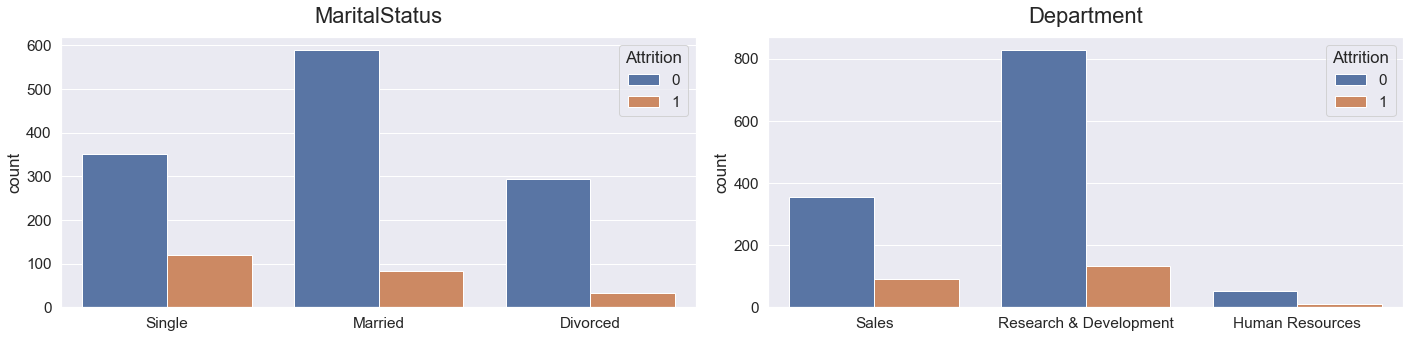

In [110]:
features = ['MaritalStatus', 'Department'] # from most important features the model found earlier

fig=plt.subplots(figsize=(20,5))

for i, f in enumerate(features):
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(wspace = 2)
    sns.countplot(x = f, data = df, hue = 'Attrition')
    plt.xlabel("")
    plt.title(f, fontsize=22, y = 1.03)
    plt.tight_layout() 

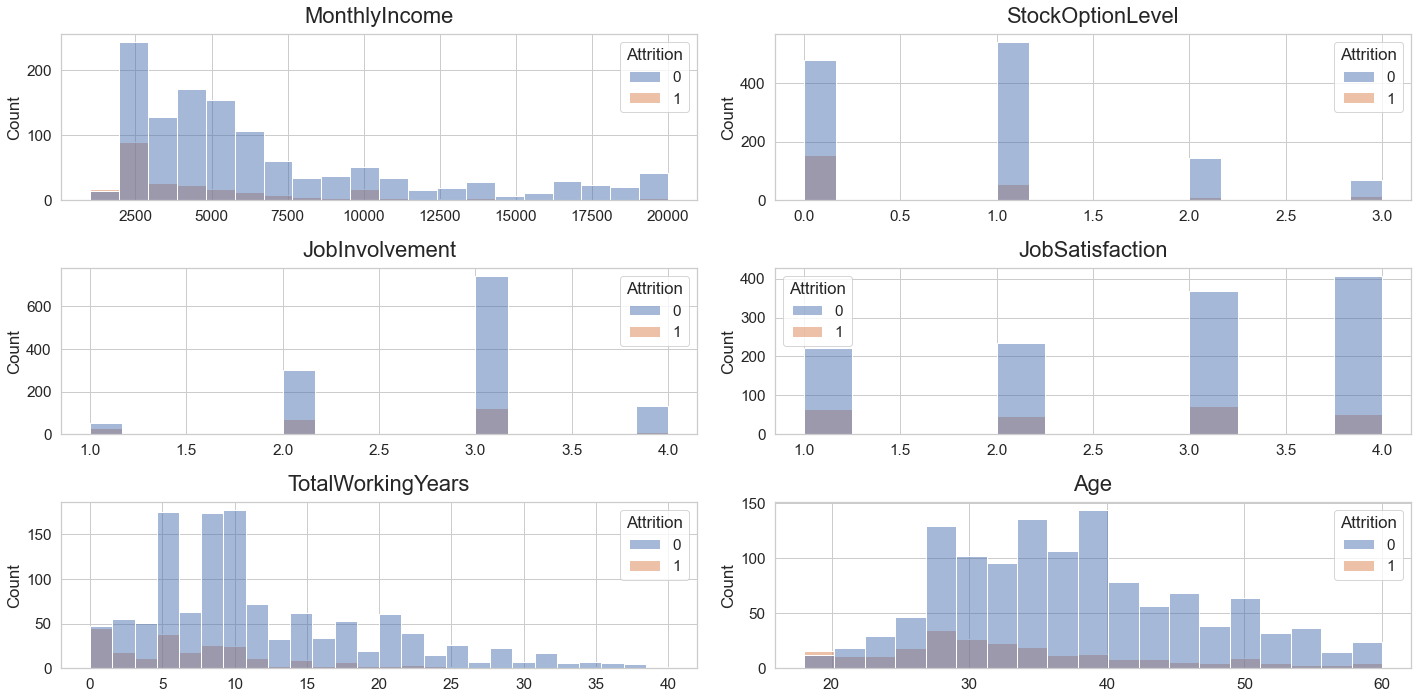

In [155]:
dist_features = [x for x in cols if x not in features] 

fig=plt.subplots(figsize=(20,10))
sns.set_style('whitegrid')

for i, f in enumerate(dist_features[:-1]): # leaving out Attrition
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace = 2, hspace = 1)   
    sns.histplot(x = f, data=df, hue = 'Attrition') 
    plt.xlabel("")
    plt.title(f, fontsize=22, y = 1.03)
    plt.tight_layout()   
    


#### Insights from the graphs (churn)
- low pay
- low stock option level
- low involvement
- low satisfaction
- new employees tend to churn more easily: the highest churn happens in the first year
- young employees (under 40) churn more easily